# Part A

In [1]:
import tensorflow
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Split and scale dataset

In [3]:
df['label'].value_counts()

disco        100
country      100
jazz         100
rock         100
blues        100
hiphop       100
reggae       100
classical    100
metal        100
pop          100
Name: label, dtype: int64

In [4]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [5]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


## Question 1
Design a feedforward deep neural network (DNN) which consists of an input layer, one hidden layer of 16 neurons with ReLU activation function, and an output softmax layer. Use an stochastic gradient descent with ‘adam’ optimizer with default parameters, and batch size = 1. Apply dropout of probability 0.3 to the hidden layer. Divide the dataset into a 70:30 ratio for training and testing. Use appropriate scaling of input features. We solely assume that there are only two datasets here: training & test. We would look into validation in Question 2 onwards.

In [6]:
#Partitioning training data

network = Sequential([
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
batch_size=1

### a) 
Use the training dataset to train the model for 50 epochs. Note: Use 50
epochs for subsequent experiments.

In [7]:
num_epochs=50

history = network.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    batch_size = batch_size,
                    verbose=2,
                    use_multiprocessing=True,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/50
700/700 - 2s - loss: 2.2362 - accuracy: 0.2229 - val_loss: 1.8055 - val_accuracy: 0.3467
Epoch 2/50
700/700 - 1s - loss: 1.6897 - accuracy: 0.3929 - val_loss: 1.5330 - val_accuracy: 0.4500
Epoch 3/50
700/700 - 1s - loss: 1.5204 - accuracy: 0.4643 - val_loss: 1.3983 - val_accuracy: 0.5033
Epoch 4/50
700/700 - 1s - loss: 1.3928 - accuracy: 0.5243 - val_loss: 1.2892 - val_accuracy: 0.5267
Epoch 5/50
700/700 - 1s - loss: 1.2897 - accuracy: 0.5343 - val_loss: 1.2100 - val_accuracy: 0.5700
Epoch 6/50
700/700 - 1s - loss: 1.2081 - accuracy: 0.5886 - val_loss: 1.1636 - val_accuracy: 0.5700
Epoch 7/50
700/700 - 1s - loss: 1.1632 - accuracy: 0.6100 - val_loss: 1.1261 - val_accuracy: 0.5600
Epoch 8/50
700/700 - 1s - loss: 1.1262 - accuracy: 0.6086 - val_loss: 1.0754 - val_accuracy: 0.6200
Epoch 9/50
700/700 - 1s - loss: 1.0876 - accuracy: 0.6043 - val_loss: 1.0548 - val_accuracy: 0.5933
Epoch 10/50
700/700 - 1s - loss: 1.0516 - accuracy: 0.6186 - val_loss: 1.0365 - val_accuracy: 0.6133

### b)
Plot accuracies on training and test data against training epochs and
comment on the plots.



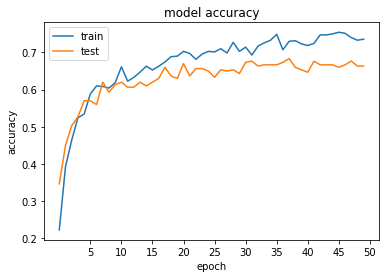

In [8]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

The accuracies are higher for the train data than they are for test data. This is because the test data contains values that the model hasn't trained for. Test accuracy converges much faster than the train accuracy.

### c)
Plot the losses on training and test data against training epochs. State the
approximate number of epochs where the test error begins to converge.



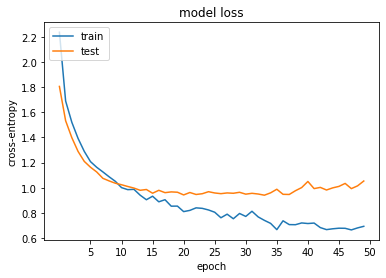

In [9]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

The test error begins to converge at approximately 13 epochs


## Question 2
In this question, we will compare the performance of the model using stochastic gradient
descent and mini-batch gradient descent, as well as determining the optimal batch size
for mini-batch gradient descent. Find the optimal batch size for mini-batch gradient
descent by training the neural network and evaluating the performances for different
batch sizes. Note: Use 3-fold cross-validation on training partition to perform parameter
selection.


In [10]:
import time
class TimingCallback(keras.callbacks.Callback):
  def __init__(self, logs={}):
    self.times=[]
  def on_epoch_begin(self, batch, logs={}):
    self.starttime = time.time()
  def on_epoch_end(self, batch, logs={}):
    self.times.append(time.time()-self.starttime)

In [13]:

num_data = len(df.index)
num_folds = 3
X = df.drop(columns_to_drop,axis=1).to_numpy()
Y = df['label'].to_numpy()
idx = np.arange(num_data)
np.random.shuffle(idx)
X, Y = X[idx], Y[idx]
nf = num_data//num_folds
batch_sizes=[1,4,8,16,32,64]
acc=[[] for i in range(len(batch_sizes))]
times=[[] for i in range(len(batch_sizes))]
for fold in range(num_folds):
    start, end = fold*nf, (fold+1)*nf
    x_test, y_test = X[start:end], Y[start:end]
    x_train  = np.append(X[:start], X[end:], axis=0)
    y_train = np.append(Y[:start], Y[end:], axis=0) 
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)
    #scale and prepare testing data
    x_test_scaled = standard_scaler.transform(x_test)
    
    for i in range(len(batch_sizes)):
      model = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.3),
      Dense(10, activation='softmax')
      ]) 
      model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
      cb = TimingCallback()
      history = model.fit(x_train_scaled, y_train,
                      epochs=num_epochs,
                      verbose=0,
                      batch_size=batch_sizes[i],
                      use_multiprocessing=True,
                      callbacks = [cb],
                      validation_data=(x_test_scaled, y_test))
      times[i].append(cb.times)
      acc[i].append(history.history['val_accuracy'])

### a)
Plot mean cross-validation accuracies over the training epochs for different
batch sizes. Limit search space to batch sizes {1,4,8,16,32, 64}.

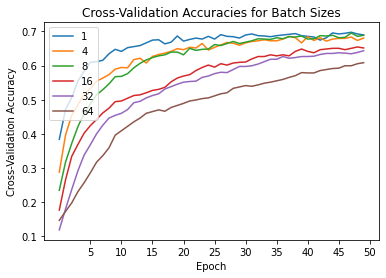

In [20]:
plt.figure(3)
plt.title('Cross-Validation Accuracies for Batch Sizes')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('Epoch')
for i in range(len(batch_sizes)):
  plt.plot(np.mean( np.array([acc[i][0], acc[i][1],acc[i][2] ]), axis=0 ))
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['1','4','8','16','32','64'], loc='upper left')


  

### b)
Create a table of median time taken to train the network for one epoch
against different batch sizes.
(Hint: Introduce a callback)

In [15]:
print("Batch Size\tTime")
for i in range(len(batch_sizes)):
  mean=np.mean( np.array([times[i][0], times[i][1],times[i][2] ]), axis=0 )
  median=np.median(mean)
  print(batch_sizes[i],"\t\t",median ," seconds")

Batch Size	Time
1 		 0.9080320596694946  seconds
4 		 0.28303416570027673  seconds
8 		 0.15053558349609375  seconds
16 		 0.07870777448018391  seconds
32 		 0.0521778662999471  seconds
64 		 0.04180959860483806  seconds


### c)
Select the optimal batch size and state reasons for your selection

In [16]:
optimal_batch_size=8

A tradeoff between accuracy and time taken to train the epoch was used to choose the batch size. Although a batch size of 1 has the earliest convergence, the time to train an epoch is much higher (0.93 seconds). Next, batch sizes of 4 and 8 have roughly similar plots for cross validation accuracy. Batch sizes of 16, 32, and 64 are much lower in accuracy so they are not considered. Between 4 and 8, 8 takes lesser time to train and is chosen as the optimal batch size.

### d)
What is the difference between mini-batch gradient descent and stochastic
gradient descent and what does this mean for model training?


Stochastic gradient descent calculates the error and updates the model for each sample in the training dataset. Updating the model so frequently is computationally expensive and causes it to take more time in training the model. On the other hand, they immediately give details on the performance of the model and the rate of improvement.
Mini-batch gradient descent splits the training dataset into small batches that are used to calculate model error and update model coefficients. The batched updates make it a more efficient process than stochastic gradient descent. While not as robust as SGD, it updates more frequently than batch gradient descent resulting in a more robust convergence, avoiding local minima.

### e)
Plot the train and test accuracies against epochs for the optimal batch size. 

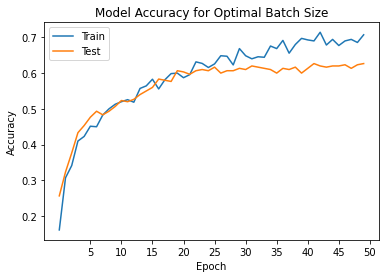

In [19]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)
model = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.3),
      Dense(10, activation='softmax')
      ]) 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                      epochs=num_epochs,
                      verbose=0,
                      batch_size=optimal_batch_size,
                      use_multiprocessing=True,
                      validation_data=(X_test, y_test))
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for Optimal Batch Size')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['Train', 'Test'], loc='upper left')

## Question 3
Find the optimal number of hidden neurons for the 2-layer network (i.e., one hidden
layer) designed in Question 1 and 2.

In [21]:
num_data = len(df.index)
num_folds = 3
X = df.drop(columns_to_drop,axis=1).to_numpy()
Y = df['label'].to_numpy()
idx = np.arange(num_data)
np.random.shuffle(idx)
X, Y = X[idx], Y[idx]
nf = num_data//num_folds
num_neurons=[8,16,32,64]
acc=[[] for i in range(len(num_neurons))]
for fold in range(num_folds):
    start, end = fold*nf, (fold+1)*nf
    x_test, y_test = X[start:end], Y[start:end]
    x_train  = np.append(X[:start], X[end:], axis=0)
    y_train = np.append(Y[:start], Y[end:], axis=0) 
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)
    #scale and prepare testing data
    x_test_scaled = standard_scaler.transform(x_test)
    for i in range(len(num_neurons)):
      model = Sequential([
      Dense(num_neurons[i], activation='relu'),
      Dropout(0.3),
      Dense(10, activation='softmax')
  ])
      
      model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
      
      history = model.fit(x_train_scaled, y_train,
                          epochs=num_epochs,
                          verbose=0,
                          batch_size=optimal_batch_size,
                          use_multiprocessing=True,
                          validation_data=(x_test_scaled, y_test))
      acc[i].append(history.history['val_accuracy'])

### a)
Plot the cross-validation accuracies against training epochs for different
numbers of hidden-layer neurons. Limit the search space of the number of
neurons to {8, 16, 32, 64}.
Continue using 3-fold cross validation on training dataset.


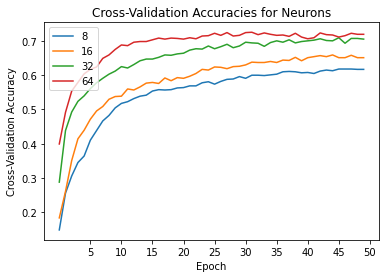

In [22]:
plt.figure(4)
plt.title('Cross-Validation Accuracies for Neurons')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('Epoch')
for i in range(len(num_neurons)):
  plt.plot(np.mean( np.array([acc[i][0], acc[i][1],acc[i][2] ]), axis=0 ))
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['8','16','32','64'], loc='upper left')

### b)
Select the optimal number of neurons for the hidden layer. State the
rationale for your selection.


In [23]:
optimal_neuron_num=32

While 64 neurons is the best choice, 32 neurons is chosen as the difference between the two is small and 32 results in a less complex model. This reduces chances of overfitting.

### c)
Plot the train and test accuracies against training epochs with the optimal
number of neurons.


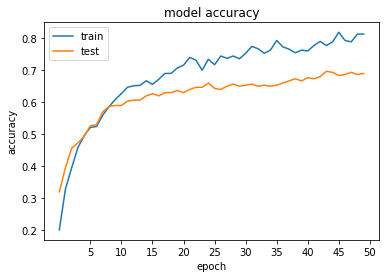

In [25]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)
model = Sequential([
      Dense(optimal_neuron_num, activation='relu'),
      Dropout(0.3),
      Dense(10, activation='softmax')
      ]) 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                  epochs=num_epochs,
                  verbose=0,
                  batch_size=optimal_batch_size,
                  use_multiprocessing=True,
                  validation_data=(X_test, y_test))
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

### d)
What other parameters could possibly be tuned?


There are several other parameters that can be tuned. The dropout rate can be optimized. Apart from this, the optimizer parameters such as learning rate can also be adjusted. The activation function can be adjusted and the number of layers can also be changed. The weights and biases can also be tuned according to the best model.

## Question 4
After you are done with the 2-layer network, design a 3-layer network with two hiddenlayers with ReLU activation, each consisting of the optimal number of neurons you
obtained in Question 3, (apply a dropout with a probability of 0.3 for each hidden layer),
and train it with a batch size of 1.


In [26]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)
network2 = Sequential([
    Dense(optimal_neuron_num, activation='relu'),
    Dropout(0.3),
    Dense(optimal_neuron_num, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
network2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
batch_size=1
history2 = network2.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    batch_size = batch_size,
                    verbose=2,
                    use_multiprocessing=True,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/50
700/700 - 2s - loss: 2.1891 - accuracy: 0.2371 - val_loss: 1.7536 - val_accuracy: 0.3900
Epoch 2/50
700/700 - 1s - loss: 1.6795 - accuracy: 0.3886 - val_loss: 1.4989 - val_accuracy: 0.4700
Epoch 3/50
700/700 - 1s - loss: 1.5086 - accuracy: 0.4557 - val_loss: 1.3407 - val_accuracy: 0.5133
Epoch 4/50
700/700 - 1s - loss: 1.3771 - accuracy: 0.4571 - val_loss: 1.2860 - val_accuracy: 0.5500
Epoch 5/50
700/700 - 1s - loss: 1.2664 - accuracy: 0.5286 - val_loss: 1.2218 - val_accuracy: 0.5400
Epoch 6/50
700/700 - 1s - loss: 1.2023 - accuracy: 0.5886 - val_loss: 1.1455 - val_accuracy: 0.5733
Epoch 7/50
700/700 - 1s - loss: 1.0821 - accuracy: 0.5843 - val_loss: 1.1259 - val_accuracy: 0.5900
Epoch 8/50
700/700 - 1s - loss: 1.0878 - accuracy: 0.6229 - val_loss: 1.1776 - val_accuracy: 0.5733
Epoch 9/50
700/700 - 1s - loss: 1.0768 - accuracy: 0.6171 - val_loss: 1.0956 - val_accuracy: 0.6200
Epoch 10/50
700/700 - 1s - loss: 0.9921 - accuracy: 0.6457 - val_loss: 1.0758 - val_accuracy: 0.6300

### a)
Plot the train and test accuracy of the 3-layer network against training
epochs.

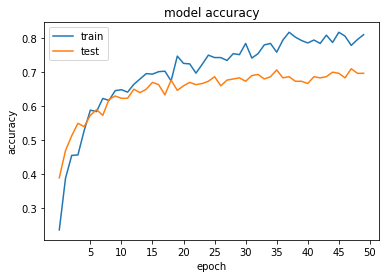

In [27]:
plt.figure(1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

### b)
Compare and comment on the performances of the optimal 2-layer network
from your hyperparameter tuning in Question 2 and 3 and the 3-layer
network.

In [31]:
print("2-layer network")
print("Mean accuracy of train data:",np.mean(history.history['accuracy']))
print("Mean accuracy of test data:",np.mean(history.history['val_accuracy']))
print("Mean loss of train data:",np.mean(history.history['loss']))
print("Mean loss of test data:",np.mean(history.history['val_loss']))
print("3-layer network")
print("Mean accuracy of train data:",np.mean(history2.history['accuracy']))
print("Mean accuracy of test data:",np.mean(history2.history['val_accuracy']))
print("Mean loss of train data:",np.mean(history2.history['loss']))
print("Mean loss of test data:",np.mean(history2.history['val_loss']))

2-layer network
Mean accuracy of train data: 0.6843714281916619
Mean accuracy of test data: 0.620399996638298
Mean loss of train data: 0.8928592705726623
Mean loss of test data: 1.094711433649063
3-layer network
Mean accuracy of train data: 0.701971428990364
Mean accuracy of test data: 0.6480000013113022
Mean loss of train data: 0.8318776738643646
Mean loss of test data: 1.105731270313263


The 3-layer network has a higher mean accuracy and lower mean loss on test data. This is because of more layers causing the model to fit better with the train data. Also, the mean loss on test data is higher in the 3-layer network.

## Question 5
We are going to dissect the purpose of dropout in the model.

### a)
Why do we add dropouts? Investigate the purpose of dropouts by removing
dropouts from your original 2-layer network (before changing the batch size
and number of neurons). Plot accuracies on training and test data with neural
network without dropout. Plot as well the losses on training and test data with
neural network without dropout.

Dropouts are added in order to prevent overfitting of the neural network model.Overfitting can be harmful as it results in the model learning the statistical noise in the training data. This causes a poor performance when tested against new, unseen data. The model becomes too less generalized.

In [32]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)
network = Sequential([
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
batch_size=1
history = network.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    batch_size = batch_size,
                    verbose=2,
                    use_multiprocessing=True,
                    validation_data=(X_test, y_test)
                    )



Epoch 1/50
700/700 - 1s - loss: 2.0075 - accuracy: 0.3029 - val_loss: 1.6009 - val_accuracy: 0.4200
Epoch 2/50
700/700 - 1s - loss: 1.3688 - accuracy: 0.5086 - val_loss: 1.3729 - val_accuracy: 0.5200
Epoch 3/50
700/700 - 1s - loss: 1.1472 - accuracy: 0.5900 - val_loss: 1.2371 - val_accuracy: 0.5400
Epoch 4/50
700/700 - 1s - loss: 1.0024 - accuracy: 0.6514 - val_loss: 1.1584 - val_accuracy: 0.5833
Epoch 5/50
700/700 - 1s - loss: 0.9062 - accuracy: 0.6771 - val_loss: 1.1337 - val_accuracy: 0.6033
Epoch 6/50
700/700 - 1s - loss: 0.8214 - accuracy: 0.7171 - val_loss: 1.0994 - val_accuracy: 0.6333
Epoch 7/50
700/700 - 1s - loss: 0.7548 - accuracy: 0.7300 - val_loss: 1.0969 - val_accuracy: 0.6500
Epoch 8/50
700/700 - 1s - loss: 0.6992 - accuracy: 0.7543 - val_loss: 1.0758 - val_accuracy: 0.6433
Epoch 9/50
700/700 - 1s - loss: 0.6543 - accuracy: 0.7757 - val_loss: 1.0702 - val_accuracy: 0.6400
Epoch 10/50
700/700 - 1s - loss: 0.6131 - accuracy: 0.7943 - val_loss: 1.0771 - val_accuracy: 0.6367

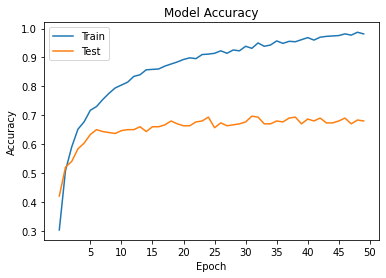

In [33]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['Train', 'Test'], loc='upper left')

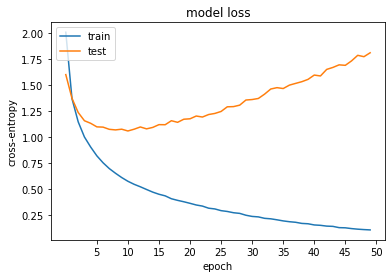

In [34]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

### b)
Explain the effect of removing dropouts. 

On removing dropouts, the model starts relying heavily on certain inputs and becomes more catered to fitting the training data. The performance on the test data is very poor as a result as seen from the graphs where there is a stark difference between the train and test plots.
This is due to the fact that neurons are no longer being randomly dropped. When this was being done, it was equivalent to training different neural networks. So, it was similar to averaging the effects of a large number of different networks. These would overfit in different ways and the net effect would reduce overfitting. The network would be forced to rely on all features rather than certain ones.

### c)
What is another approach that you could take to address overfitting in the
model?

There are multiple ways to handle overfitting apart from using dropouts:

*   Making the model less complex is an option. Reducing the number of neurons or the number of layers (not applicable here as there is only one hidden layer) can help handle overfitting.
*   Regularization of weights can also help handle overfitting. In this method, a cost function is added for large weights. This way, it lets the model be more generalized.



## Conclusion

There are several points to note from the observations.

From Question 1, we can note that based on the graphs, the loss is higher in test data than training data. Also, the accuracy is higher for training data.

From Question 2, we found the optimal batch size for the given model is 8. The median time taken to train an epoch decreases with increase in batch size. The time falls much faster at first and then gradually becomes lesser with increase in batch size.

From Question 3, it was found that the optimal number of neurons for the given model is 32 as a tradeoff for complexity. It was also observed that 64 neurons provided the best accuracy otherwise.

From Question 4, we observed that the 3-layer network has a higher mean accuracy and lower mean loss on test data as compared to the hypertuned 2-layer network.

From Question 5, the effect of removing dropouts were observed. It was noticed that the training data performance improved but the test data performance was very poor.

Among the tuned parameters, we can observe that number of neurons in the 2-layer network plays a larger role. For batch sizes 1,4, and 8 we see that after 50 epochs, the accuracies are nearly similar. The other batch sizes are not too far off either. However, for the number of neurons, we see a larger difference in accuracy between different values. There is a substantial difference in accuracy at 50 epochs between 8 neurons and 64 neurons. To avoid overfitting, 32 neurons was chosen as the optimal number of neurons. However, it should be noted that there is a much bigger gap between these values than batch size of 1 and 8. This could be due to the fact that

Apart from using this method, the genres can be classified using CNNs. The waveforms can be converted to spectograms. As they somewhat resemble images, CNNs are useful to classify into different genres.

In fact, this particular method of modelling waveforms can be applied to other aspects as well. For example, recognizing animals from their noises or a substance from its noise on falling.




# Part B

In [1]:
# Setting the seed here is sufficient. 
# If you don't plan to use these starter code, make sure you add this cell.

SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [2]:
from keras import backend
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import ...

from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup

In [3]:
import pandas as pd
import math
df = pd.read_csv('hdb_price_prediction.csv')
df.head()

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0


In [4]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("resale_price")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary") # NOTE: as mentioned in the question paper, this actually does one-hot encoding. You could replace 'binary' with 'one_hot' if you wish to.

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature


## Question 1

### a)
Divide the dataset (‘HDB_price_prediction.csv’) into train and test sets
by using entries from year 2020 and before as training data (with the
remaining data from year 2021 used as test data).
Why is this done instead of random train/test splits? 

In [5]:
#Split data
train_dataframe = df[df['year'] <= 2020] # 0.8393471285568813
val_dataframe = df[df['year'] > 2020]

train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

train_ds = train_ds.batch(128)
val_ds = val_ds.batch(128)

The newer the data, the more relevant it is. In order to ensure that the model works well, it needs to work with recent data. Thus, the latest year, 2021, should be used as test data.

### b)
Design a 2-layer feedforward neural network
consisting of an input layer, a hidden layer (10 neurons, ReLU as activation
function), and a linear output layer. One-hot encoding should be applied
to categorical features and numeric features are standardised. After
encoding / standardisation, the input features should be concatenated.
The input layer should use these features:
- **Numeric features**: dist_to_nearest_stn, dist_to_dhoby,
degree_centrality, eigenvector_centrality, remaining_lease_years,
floor_area_sqm
- **Categorical features**: month, flat_model_type, storey_range 

In [6]:
# Categorical features encoded as integers
month = keras.Input(shape=(1,), name="month", dtype="int64")
month_encoded = encode_categorical_feature(month, "month", train_ds, False)

# Categorical feature encoded as string
flat_model_type = keras.Input(shape=(1,), name="flat_model_type", dtype="string")
flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)
storey_range = keras.Input(shape=(1,), name="storey_range", dtype="string")
storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)


# Numerical features
floor_area_sqm = keras.Input(shape=(1,), name="floor_area_sqm")
floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", train_ds)
dist_to_nearest_stn = keras.Input(shape=(1,), name="dist_to_nearest_stn")
dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", train_ds)
dist_to_dhoby = keras.Input(shape=(1,), name="dist_to_dhoby")
dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", train_ds)
degree_centrality = keras.Input(shape=(1,), name="degree_centrality")
degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", train_ds)
eigenvector_centrality = keras.Input(shape=(1,), name="eigenvector_centrality")
eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", train_ds)
remaining_lease_years = keras.Input(shape=(1,), name="remaining_lease_years")
remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", train_ds)

all_features = layers.concatenate(
    [
        month_encoded,
        storey_range_encoded,
        flat_model_type_encoded,
        floor_area_sqm_encoded,
        remaining_lease_years_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded
    ]
)


In [7]:
all_inputs =[month,
        storey_range,
        flat_model_type,
        floor_area_sqm,
        remaining_lease_years,
        degree_centrality,
        eigenvector_centrality,
        dist_to_nearest_stn,
        dist_to_dhoby]
# feedforward network with one hidden layer
x = layers.Dense(10, activation="relu")(all_features)
output = layers.Dense(1, activation="linear")(x)
model = keras.Model(all_inputs, output)

### c)
On the training data, train the model for 100 epochs using mini-batch
gradient descent with batch size = 128, Use ‘adam’ optimiser with a
learning rate of 𝛼 = 0.05 and mean square error as cost function. 

In [8]:
# metric for R2 value
def r_squared(y_true, y_pred):
  numerator=backend.sum(backend.square(y_true-y_pred))
  denominator=backend.sum(backend.square(y_true-backend.mean(y_true)))
  return 1-numerator/denominator

In [9]:
# metric for RMSE value
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
 

In [10]:
#Callback function needed for part f
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [11]:
num_epochs=100
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt, 
                  loss='mse',
              metrics=[r_squared,rmse])
history = model.fit(train_ds, 
                    epochs=num_epochs,  
                    verbose = 2, 
                    batch_size=128,
                    callbacks = [model_checkpoint_callback],
                    validation_data=val_ds)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


683/683 - 4s - loss: 187177730048.0000 - r_squared: -7.0489e+00 - rmse: 406406.4375 - val_loss: 170675044352.0000 - val_r_squared: -5.6966e+00 - val_rmse: 391168.4688
Epoch 2/100
683/683 - 2s - loss: 67174182912.0000 - r_squared: -1.8796e+00 - rmse: 229878.0625 - val_loss: 39814365184.0000 - val_r_squared: -5.5034e-01 - val_rmse: 177102.5156
Epoch 3/100
683/683 - 3s - loss: 10811350016.0000 - r_squared: 0.5418 - rmse: 75812.8281 - val_loss: 11000289280.0000 - val_r_squared: 0.5751 - val_rmse: 77102.8672
Epoch 4/100
683/683 - 3s - loss: 5528955392.0000 - r_squared: 0.7649 - rmse: 54047.2891 - val_loss: 8578768384.0000 - val_r_squared: 0.6688 - val_rmse: 67311.1406
Epoch 5/100
683/683 - 2s - loss: 4995456512.0000 - r_squared: 0.7869 - rmse: 52212.9766 - val_loss: 7987132928.0000 - val_r_squared: 0.6909 - val_rmse: 65627.9688
Epoch 6/100
683/683 - 3s - loss: 4631280128.0000 - r_squared: 0.8023 - rmse: 50583.7031 - val_loss: 7682764800.0000 - val_r_squared: 0.7037 - val_rmse: 65113.9453
Ep

### d)
Plot the train and test root mean square errors (RMSE) against epochs 

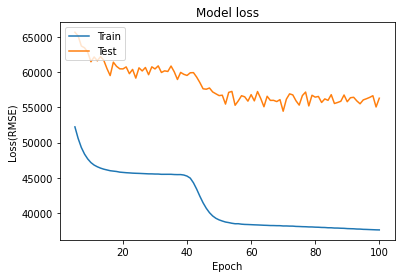

In [12]:
import matplotlib.pyplot as plt
plt.figure()
x_data = range(101)
plt.plot(x_data[5:],history.history['rmse'][4:])
plt.plot(x_data[5:],history.history['val_rmse'][4:])

plt.title('Model loss')
plt.ylabel('Loss(RMSE)')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

### e) 
State the epoch with the lowest test error. State the test R2 value at
that epoch.

Epoch 70 has the lowest test error. The R2 value is 0.8073545098304749

In [13]:
best_epoch=0
for i in range(len(history.history['val_loss'])):
  if (history.history['val_loss'][i]<history.history['val_loss'][best_epoch-1]):
    best_epoch=i+1
print("Best Epoch:",best_epoch)
print("R2 Value:",history.history['val_r_squared'][best_epoch-1])

Best Epoch: 70
R2 Value: 0.8073545098304749


### f)
Using the model from that best epoch, plot the predicted values and
target values for a batch of 128 test samples. (Hint: Use a callback to
restore the best model weights. Find out how to retrieve a batch from
tf.BatchDataset. A scatter plot will suffice.)

In [14]:
model.load_weights(checkpoint_filepath)
sample = val_ds.take(1)
predictions=model.predict(sample)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


Text(0.5, 0, 'Test Samples')

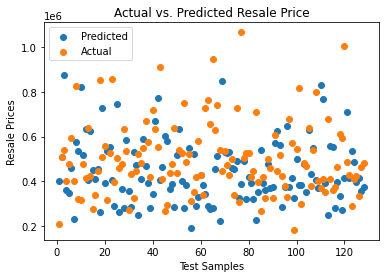

In [15]:
targets=[]
for data,labels in sample:
  label=labels.numpy()
  targets.append(label)
 
x=range(1,129)
y=predictions.ravel()
y2=targets
plt.figure()
plt.scatter(x,y)
plt.scatter(x,y2)
plt.legend(['Predicted', 'Actual'], loc='upper left')
plt.title('Actual vs. Predicted Resale Price')
plt.ylabel('Resale Prices')
plt.xlabel('Test Samples')

## Question 2

Instead of using one-hot encoding, an alternative approach entails the use of embeddings
to encode categorical variables. Such an approach utilises the ability of neural networks to
learn richer representations3 of the data – an edge it has over traditional ML models.


### a)
Add an Embedding layer with output_dim = floor(num_categories/2)
after the one-hot embeddings for categorical variables.

In [16]:
def intencode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class() 

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [17]:
import math
month_num_categories=len(df['month'].unique())
month_encoded=intencode_categorical_feature(month,"month", train_ds, False)
month_embedded = keras.layers.Embedding(input_dim=month_num_categories+1,output_dim=math.floor(month_num_categories/2),name='month_embedding')(month_encoded)
storey_range_num_categories=len(df['storey_range'].unique())
storey_range_encoded=intencode_categorical_feature(storey_range,"storey_range", train_ds, True)
storey_range_embedded = keras.layers.Embedding(input_dim=storey_range_num_categories+1,output_dim=math.floor(storey_range_num_categories/2),name='storey_range_embedding')(storey_range_encoded)
flat_model_type_num_categories=len(df['flat_model_type'].unique())
flat_model_type_encoded=intencode_categorical_feature(flat_model_type,"flat_model_type", train_ds, True)
flat_model_type_embedded = keras.layers.Embedding(input_dim=flat_model_type_num_categories+1,output_dim=math.floor(flat_model_type_num_categories/2),name='flat_model_type_embedding')(flat_model_type_encoded)

### b)
The Embedding layer produces a 2D output (3D, including batch),
which cannot be concatenated with the other features. Look through
the Keras layers API to determine which layer to add in, such that all
the features can be concatenated. Train the model using the same
configuration as Q1. 

In [18]:
month_flatten = keras.layers.Flatten()(month_embedded)
storey_range_flatten = keras.layers.Flatten()(storey_range_embedded)
flat_model_type_flatten = keras.layers.Flatten()(flat_model_type_embedded)
all_features = layers.concatenate(
    [
        month_flatten,
        storey_range_flatten,
        flat_model_type_flatten,
        floor_area_sqm_encoded,
        remaining_lease_years_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded
    ]
)

In [19]:
opt = keras.optimizers.Adam(learning_rate=0.05)
x = layers.Dense(10, activation="relu")(all_features)
output = layers.Dense(1, activation="linear")(x)
model2 = keras.Model(all_inputs, output)
num_epochs=100

model2.compile(optimizer=opt, 
                  loss='mse',metrics=[r_squared,rmse])
history2 = model2.fit(train_ds, 
                    epochs=num_epochs,  
                    verbose = 2,
                    batch_size=128,
                    validation_data=(val_ds))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


683/683 - 4s - loss: 46672310272.0000 - r_squared: -1.0140e+00 - rmse: 142362.1250 - val_loss: 11886409728.0000 - val_r_squared: 0.5424 - val_rmse: 71180.4844
Epoch 2/100
683/683 - 3s - loss: 8083035136.0000 - r_squared: 0.6553 - rmse: 65099.6016 - val_loss: 10083025920.0000 - val_r_squared: 0.6086 - val_rmse: 67781.4297
Epoch 3/100
683/683 - 3s - loss: 7017737728.0000 - r_squared: 0.7001 - rmse: 60645.6094 - val_loss: 8941665280.0000 - val_r_squared: 0.6544 - val_rmse: 64586.4961
Epoch 4/100
683/683 - 3s - loss: 6258434560.0000 - r_squared: 0.7320 - rmse: 57137.4609 - val_loss: 8302200320.0000 - val_r_squared: 0.6785 - val_rmse: 63317.7812
Epoch 5/100
683/683 - 3s - loss: 5587093504.0000 - r_squared: 0.7609 - rmse: 53980.8711 - val_loss: 7894686720.0000 - val_r_squared: 0.6937 - val_rmse: 63164.1641
Epoch 6/100
683/683 - 3s - loss: 5076578816.0000 - r_squared: 0.7826 - rmse: 51589.4844 - val_loss: 7304058880.0000 - val_r_squared: 0.7162 - val_rmse: 61664.4648
Epoch 7/100
683/683 - 3s 

### c)
 Compare the current model performances in terms of both test RMSE
and test R
2 with the model from Q1 (at their own best epochs) and
suggest a possible reason for the difference in performance.

In [20]:
best_epoch2=0
for i in range(len(history2.history['val_loss'])):
  if (history2.history['val_loss'][i]<history2.history['val_loss'][best_epoch2-1]):
    best_epoch2=i+1
print(best_epoch2)

84


The best epoch is epoch 84. The values are as follows:

In [21]:
print("RMSE:",history2.history['val_rmse'][best_epoch2-1],"R2",history2.history['val_r_squared'][best_epoch2-1])

RMSE: 52237.8046875 R2 0.82480388879776


Values in model from question 1:

In [22]:
print("RMSE:",history.history['val_rmse'][best_epoch-1],"R2",history.history['val_r_squared'][best_epoch-1])

RMSE: 54432.6875 R2 0.8073545098304749


As embedded layer gives a much more richer representation of data, we can see that there is a difference in performance between the two. Thus, the RMSE for the model with the embedded layer has a lower RMSE (loss) and a higher R^2. One-hot encoding gives a sparse representation. One-hot encoding also results in high memory consumption.

## Question 3

Recursive feature elimination (RFE) is a feature selection method that removes
unnecessary features from the inputs. It can also shed some insights on how much each
feature contributes to the prediction task

### a)
Continue with the model architecture you have after Q2. Via a callback,
introduce early stopping (based on val_loss, with patience of 10 epochs) to
the model.

In [23]:
def valid_callback(name):
  return [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

### b)
Start by removing one input feature whose removal leads to the minimum
drop (or maximum improvement) in performance5
. Repeat the procedure
recursively on the reduced input set until the optimal number of input
features is reached6
. Remember to remove features one at a time. Record
the RMSE of each experiment neatly in a table.

In [24]:
#boolean mask with one feature marked as false
features_mask = [[False, True, True, True, True, True, True, True, True], 
                [True, False, True, True, True, True, True, True, True],  
                [True, True, False, True, True, True, True, True, True],  
                [True, True, True, False, True, True, True, True, True],  
                [True, True, True, True, False, True, True, True, True], 
                [True, True, True, True, True, False, True, True, True],  
                [True, True, True, True, True, True, False, True, True], 
                [True, True, True, True, True, True, True, False, True],  
                [True, True, True, True, True, True, True, True, False]]  
best_error=1e15
all_layers=  [
        month_flatten,
        storey_range_flatten,
        flat_model_type_flatten,
        floor_area_sqm_encoded,
        remaining_lease_years_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded
    ]
all_layers_names=  [
        'month',
        'storey_range',
        'flat_model_type',
        'floor_area_sqm',
        'remaining_lease_years',
        'degree_centrality',
        'eigenvector_centrality',
        'dist_to_nearest_stn',
        'dist_to_dhoby']
table_features=[]
table_rmse=[]
def compile_and_fit(features_mask):
  inputs = np.array(all_inputs)[features_mask].tolist()
        
  selected_layers = np.array(all_layers)[features_mask].tolist()
        
  input_layers = keras.layers.Concatenate()(selected_layers)
  x = layers.Dense(10, activation="relu")(input_layers)
  output = layers.Dense(1, activation="linear")(x)
  model3 = keras.Model(inputs, output)
  model3.compile(optimizer=opt, 
                  loss='mse',metrics=[rmse])
  history3 = model3.fit(train_ds, 
                    epochs=num_epochs,  
                    verbose = 0,
                    callbacks=valid_callback('model'), 
                    validation_data=(val_ds))
  table_features.append(np.array(all_layers_names)[np.invert(features_mask)].tolist())
  table_rmse.append(np.mean(history3.history['val_rmse']))
  return np.min(history3.history['val_loss'])
def remove_features(num_features,features_mask,removed_features,best_error):
  performance=[]
  for i in range(len(features_mask)):
    if i not in removed_features:
      performance.append(compile_and_fit(features_mask[i]))
    else:
      performance.append(1e15)
  if (best_error<np.min(performance)):
    return removed_features
  else: 
    best_error=np.min(performance)
    index=np.argmin(performance)
    print(index)
    removed_features.append(index)
    for i in range(len(features_mask)):
      features_mask[i][index]=False
    remove_features(num_features-1,features_mask,removed_features,best_error)

removed_features=[]
best_model=remove_features(9,features_mask,removed_features,best_error)
print("Completed RFE")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['month', 'year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn', 'storey_range'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn', 'flat_model_type'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['y

5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['month', 'year', 'full_address', 'nearest_stn', 'degree_centrality'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn', 'degree_centrality', 'storey_range'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn', 'degree_centrality', 'flat_model_type'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.7/dist-packages/keras/engin

Completed RFE


In [25]:
print("Removed Features:")
for val in removed_features:
  print(all_layers_names[val])

Removed Features:
degree_centrality


In [33]:
print("Removed Features\t\t\tRMSE")
for i in range(len(table_rmse)):
  print(table_features[i],"\t\t\t",table_rmse[i])

Removed Features			RMSE
['month'] 			 57222.18699048913
['storey_range'] 			 60805.72920496324
['flat_model_type'] 			 66076.40701219512
['floor_area_sqm'] 			 60770.76576450893
['remaining_lease_years'] 			 63549.37180397727
['degree_centrality'] 			 57156.41735197369
['eigenvector_centrality'] 			 57772.2119140625
['dist_to_nearest_stn'] 			 64290.33830180921
['dist_to_dhoby'] 			 67217.26106770833
['month', 'degree_centrality'] 			 61410.02641369047
['storey_range', 'degree_centrality'] 			 64472.056818181816
['flat_model_type', 'degree_centrality'] 			 66170.12051504629
['floor_area_sqm', 'degree_centrality'] 			 59903.605009191175
['remaining_lease_years', 'degree_centrality'] 			 62494.74309593023
['degree_centrality', 'eigenvector_centrality'] 			 60519.08147321428
['degree_centrality', 'dist_to_nearest_stn'] 			 61819.01988636364
['degree_centrality', 'dist_to_dhoby'] 			 68072.45804398147


### c)
Compare the performances of the model with all 9 input features (from
Q2) and the best model arrived at by RFE, in terms of both RMSE and R2.

In [43]:
#creating mask for best model
rfe_mask=[True,True,True,True,True,True,True,True,True]
for val in removed_features:
  rfe_mask[val]=False
inputs = np.array(all_inputs)[rfe_mask].tolist()   
selected_layers = np.array(all_layers)[rfe_mask].tolist()
input_layers = keras.layers.Concatenate()(selected_layers)
x = layers.Dense(10, activation="relu")(input_layers)
output = layers.Dense(1, activation="linear")(x)
best_model = keras.Model(inputs, output)
best_model.compile(optimizer=opt, 
                  loss='mse',metrics=[rmse,r_squared])
rfe_history = best_model.fit(train_ds, 
                    epochs=num_epochs,  
                    verbose = 0, 
                    validation_data=(val_ds))

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn', 'degree_centrality'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


Q2 Model Mean RMSE
RFE Model Mean RMSE


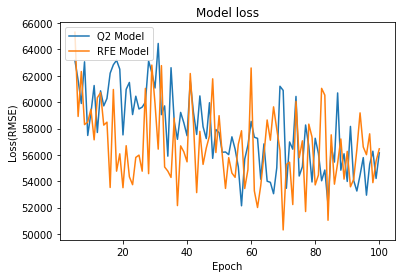

In [44]:
plt.figure()
x_data = range(101)
plt.plot(x_data[5:],history2.history['val_rmse'][4:])
plt.plot(x_data[5:],rfe_history.history['val_rmse'][4:])

plt.title('Model loss')
plt.ylabel('Loss(RMSE)')

plt.xlabel('Epoch')
plt.legend(['Q2 Model', 'RFE Model'], loc='upper left')


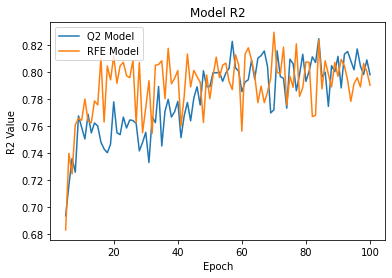

In [47]:
plt.figure()
x_data = range(101)
plt.plot(x_data[5:],history2.history['val_r_squared'][4:])
plt.plot(x_data[5:],rfe_history.history['val_r_squared'][4:])

plt.title('Model R2')
plt.ylabel('R2 Value')

plt.xlabel('Epoch')
plt.legend(['Q2 Model', 'RFE Model'], loc='upper left')

In [48]:
print("Q2 Model Mean RMSE",np.mean(history2.history['val_rmse']))
print("RFE Model Mean RMSE",np.mean(rfe_history.history['val_rmse']))
print("Q2 Model Mean R2",np.mean(history2.history['val_r_squared']))
print("RFE Model Mean R2",np.mean(rfe_history.history['val_r_squared']))

Q2 Model Mean RMSE 58176.0415234375
RFE Model Mean RMSE 57019.13984375
Q2 Model Mean R2 0.7751673203706742
RFE Model Mean R2 0.7845336389541626


From this, we can see that the RFE Model has lower mean RMSE and higher mean R2

### d)
By examining the changes in model performance whenever a feature is
removed, evaluate the usefulness of each feature for the task of HDB resale
price prediction. 

Using the RMSE table from part B, the usefulness of each feature can be estimated.

On removing certain features, an RMSE greater than 62,000 was obtained. This indicates these are important features. They are, namely, 


*   flat_model_type
*   remaining_lease_years
*   dist_to_nearest_stn
*   dist_to_dhoby

Less important factors had a RMSE of around 57,000 on being removed and these were 

*  eigenvector_centrality
*  degree_centrality
*  month

Meanwhile, floor_area_sqm and storey_range lie somewhere in the middle in terms of importance



## Conclusion

From Part B too, a number of observations can be noted.

In question 1, a model was created by one-hot encoding the categorical variable. One-hot encoding creates a new dimension for each category. It provides a sparse representation of data.

In question 2, an embedded layer was used to encode the categorical variables. It provided a richer representation of data and provided a lower RMSE and higher R2 than the model in question 1. 

In question 3, RFE is performed. Features are eliminated recursively leading to the elimination of unnecessary features. Based on the RMSE obtained on removing the features, the importance of each feature was evaluated. The model was also seen to have lower mean RMSE than the model from Question 2.

RFE was used to remove unnecessary features to improve the model. Like part A, this model can also be hypertuned using several parameters. The batch size, number of neurons, learning rate and other optimizer parameters can be modified to improved the model.
In order to predict an increase in price, we may try and use the model to predict the price with different values of each feature. Each feature can be tested one by one with varying values to see how the price fluctuates and see which features are proportional to the price. These can be used to determine how each features will affect the price.

